<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [36]:
""" Import Statements """

# Classics
import pandas as pd

# Base
from collections import Counter
import re
import string

# Plotting
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# NLP Libraries
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read thru the documentation to accomplish this task. 

`Tip:` You will need to install the `bs4` library inside your conda environment. 

In [32]:
pip install beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install ftfy

Note: you may need to restart the kernel to use updated packages.


In [13]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [7]:
pwd

'/Users/jorge/Unit 4 DS 10/DS-Unit-4-Sprint-1-NLP/module2-vector-representations'

In [15]:
df = pd.read_csv("/Users/jorge/Unit 4 DS 10/DS-Unit-4-Sprint-1-NLP/module2-vector-representations/data/job_listings.csv")
df.shape

(426, 3)

In [16]:
df.head(5)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [17]:
df.tail(5)

,Unnamed: 0,description,title
421,421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist
425,425,b'<div></div><div><div><div><div><p>Cerner Int...,Data Scientist


In [18]:
df.describe(exclude='number')

,description,title
count,426,426
unique,356,177
top,"b""About the Company\n<br/><br/>\nCivis Analyti...",Data Scientist
freq,3,150


In [19]:
df.dtypes

Unnamed: 0      int64
description    object
title          object
dtype: object

In [38]:
df['description'][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [57]:
df['description'] = df['description'].str.replace(r'\\(x|n)[a-z0-9]{0,2}', ' ')
df['description'] = df['description'].str.replace(r'<[^<]+?>', '').str.replace(r'^b.', '')

In [112]:
df['description'].value_counts(normalize=True)[:3]

We\'re looking for Data Scientists who are passionate about generating actionable insights to drive product decisions across the business. You enjoy working with cutting edge technology and the ability to see your insights applied to real products on a regular basis.  You are focused on impact, a self-starter, and have demonstrated success in using data science to understand users and drive growth of a product or business. In approaching new problems, you demonstrate sharp critical thinking, intellectual curiosity, data fluency, and a collaborative work ethic. These roles are within the Strategy department and report to the Consumer Analytics Manager in Squarespace\'s New York offices.  Depending on your area of focus, questions you may tackle in a typical day include:   What are the drivers of the growth of our Commerce product? How can we provide small businesses with tools to be more successful? What paths do users take through our product and how should that influence our product d

## 2) Use Spacy to tokenize the listings 

In [60]:
##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [61]:
nlp = spacy.load('en_core_web_lg')

In [62]:
#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [63]:
#Tokenizer Pipe

tokens = []

# Make the tokens
for doc in nlp.pipe(df['description'], disable=['tagger', 'parser', 'ner']):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop==False) & (token.is_punct==False):
           doc_tokens.append(token.text)
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [64]:
df['tokens'].head()

0    [Job, Requirements, Conceptual, understanding,...
1    [Job, Description,  , Data, Scientist, 1, help...
2    [Data, Scientist, working, consulting, busines...
3    [$, 4,969, $, 6,756, monthContractUnder, gener...
4    [Location, USA,     , multiple, locations, 2, ...
Name: tokens, dtype: object

In [69]:
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return lemmas

df['lemmas'] = df['description'].apply(get_lemmas)

In [71]:
print(df.shape)
df.head()

(426, 5)


,Unnamed: 0,description,title,tokens,lemmas
0,0,Job Requirements: Conceptual understanding in ...,Data scientist,"[Job, Requirements, Conceptual, understanding,...","[job, requirement, conceptual, understanding, ..."
1,1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I,"[Job, Description, , Data, Scientist, 1, help...","[job, description, , Data, Scientist, 1, help..."
2,2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, Scientist, working, consulting, busines...","[Data, scientist, work, consult, business, res..."
3,3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[$, 4,969, $, 6,756, monthContractUnder, gener...","[$, 4,969, $, 6,756, monthcontractunder, gener..."
4,4,Location: USA multiple locations 2+ years ...,Data Scientist,"[Location, USA, , multiple, locations, 2, ...","[location, USA, , multiple, location, 2, +..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [ ]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

In [75]:
# create the transformer:
vect = CountVectorizer(stop_words='english')

#Learn our Vocab
vect.fit(df['description'])

# Get sparse dtm
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,00,000,02115,03,0356,04,05,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
dtm.shape

(426, 8428)

## 4) Visualize the most common word counts

In [78]:
doc_len = [len(doc) for doc in df]

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


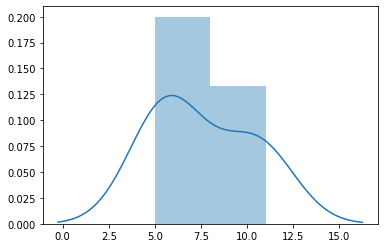

In [79]:
sns.distplot(doc_len)
plt.show()

In [80]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [82]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
3,data,418,3586,1.0,0.025782,0.025782,0.981221
25,,365,2257,2.0,0.016227,0.042010,0.856808
160,,319,1259,3.0,0.009052,0.051062,0.748826
335,business,317,1120,4.0,0.008053,0.059114,0.744131
72,experience,372,1074,5.0,0.007722,0.066836,0.873239


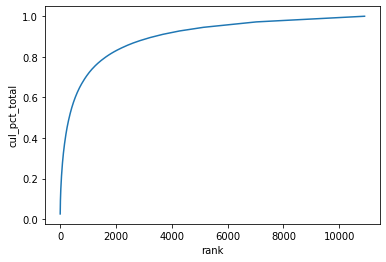

In [83]:
# cumlative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


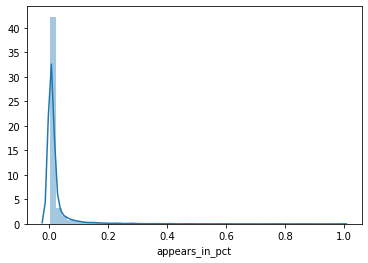

In [84]:
# Frequency of apperances
sns.distplot(wc['appears_in_pct'])
plt.show()

/Users/jorge/opt/anaconda3/envs/U4-S1-NLP-DS10/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


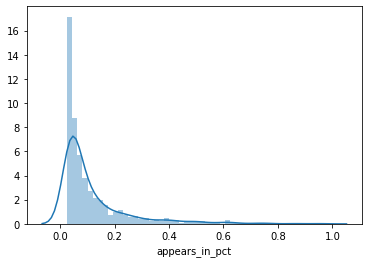

In [113]:
# Tree-Map w/ Words that appear in a least 2.5% of documents. 

wc = wc[wc['appears_in_pct'] >= 0.025]

sns.distplot(wc['appears_in_pct'])
plt.show()

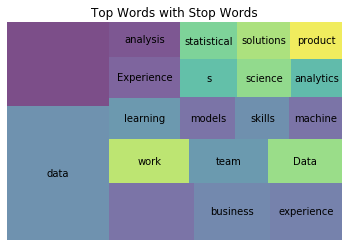

In [87]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7)
plt.title('Top Words with Stop Words')
plt.axis('off')
plt.show()

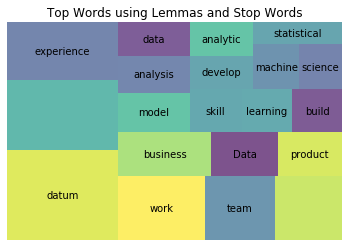

In [95]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.7 )
plt.axis('off')
plt.title('Top Words using Lemmas and Stop Words')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [97]:
# instantiate vectorizer object:
tfidf = TfidfVectorizer(max_df=.97,
                        min_df=3,
                        stop_words='english')

# create a vocabulary and get word counts per document:
dtm_tfidf = tfidf.fit_transform(df['description'])

# print word counts

# get feature names to use as dataframe column headers:
dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())

# view Feature Matrix as DataFrame:
dtm_tfidf.head()

,00,000,04,10,100,1079302,11,12,14,15,...,writing,written,www,xgboost,year,years,yearthe,yes,york,yrs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08973,0.032048,0.0,0.0,0.043808,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.060347,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.000000,0.113048,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [101]:
from sklearn.neighbors import NearestNeighbors

# fit on dtm_tfidf:
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [106]:
jobs_description =['Searching for an entry level data science position. Associate degree in television and motion pictures. Certficate in project managment and knowledgable of Python, SQL, Data Visulization, Machine Learning, Linear Algebra, Databases, Statistics and Modeling, Natural Language Processing. Benefits, Health Insurance, Vactaion Paid time off, Performance Bonuses, 401k, Retirement Plan, Employee Development Programs']   

In [107]:
job_search = tfidf.transform(jobs_description)

In [108]:
nn.kneighbors(job_search.todense())

(array([[1.27758688, 1.29948755, 1.29948755, 1.30451294, 1.30967287]]),
 array([[306, 108, 266, 309, 293]]))

In [111]:
df['description'].iloc[293]

"General Information Ref #: 25256 Employee Type: Full Time Location: New York Experienced Required: Please See Below Education Required: Masters Degree Date published: 15-Mar-2019 About Us: We are PIMCO, a leading global asset management firm. We manage investments and develop solutions across the full spectrum of asset classes, strategies and vehicles: fixed income, equities, commodities, asset allocation, ETFs, hedge funds and private equity. PIMCO is one of the largest investment managers, actively managing more than $1.66 trillion in assets for clients around the world. PIMCO has over 2,500 employees in 14 offices globally. PIMCO is recognized as an innovator, industry thought leader and trusted advisor to our clients. PIMCO is one of the world   s premier fixed income investment managers with thousands of professionals around the world united in a single purpose: creating opportunities for our clients in every environment. Since 1971, we have brought innovation and expertise to ou

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 